In [7]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt

pickle_file = 'SVHN_multi.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (230070, 32, 32, 1) (230070, 6)
Validation set (5684, 32, 32, 1) (5684, 6)
Test set (13068, 32, 32, 1) (13068, 6)


In [3]:
image_size = 32
num_labels = 11
num_channels = 1

sess = tf.InteractiveSession()

x_image = tf.placeholder(tf.float32, shape=(None, 32, 32, 1), name="x_image")
y = tf.placeholder(tf.int64, shape=(None, 6), name="y")

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

def max_pool_1x1(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 1, 1, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 48])
b_conv1 = bias_variable([48])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 48, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_1x1(h_conv2)

W_fc1 = weight_variable([16384, 3072])
b_fc1 = bias_variable([3072])

h_pool2_flat = tf.contrib.layers.flatten(h_pool2)
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32, name="keep_prob")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_1 = weight_variable([3072, 11])
b_1 = bias_variable([11])
W_2 = weight_variable([3072, 11])
b_2 = bias_variable([11])
W_3 = weight_variable([3072, 11])
b_3 = bias_variable([11])
W_4 = weight_variable([3072, 11])
b_4 = bias_variable([11])
W_5 = weight_variable([3072, 11])
b_5 = bias_variable([11])

y_1 = tf.matmul(h_fc1_drop, W_1) + b_1
y_2 = tf.matmul(h_fc1_drop, W_2) + b_2
y_3 = tf.matmul(h_fc1_drop, W_3) + b_3
y_4 = tf.matmul(h_fc1_drop, W_4) + b_4
y_5 = tf.matmul(h_fc1_drop, W_5) + b_5

y_pred = tf.stack([y_1,y_2,y_3,y_4,y_5])

y_pred_class = tf.transpose(tf.argmax(y_pred, dimension=2))
y_pred_class = tf.identity(y_pred_class, name='y_pred_class')

Initialized
step 0, Batch accuracy 0
Valid accuracy 0
step 100, Batch accuracy 0.03125
Valid accuracy 0.0381773
step 200, Batch accuracy 0.0703125
Valid accuracy 0.0485574
step 300, Batch accuracy 0.0234375
Valid accuracy 0.0432794
step 400, Batch accuracy 0.0546875
Valid accuracy 0.0482055
step 500, Batch accuracy 0.0234375
Valid accuracy 0.054715
step 600, Batch accuracy 0.117188
Valid accuracy 0.0705489
step 700, Batch accuracy 0.101562
Valid accuracy 0.0812808
step 800, Batch accuracy 0.09375
Valid accuracy 0.101865
step 900, Batch accuracy 0.109375
Valid accuracy 0.124912
step 1000, Batch accuracy 0.148438
Valid accuracy 0.148311
step 1100, Batch accuracy 0.242188
Valid accuracy 0.17171
step 1200, Batch accuracy 0.195312
Valid accuracy 0.192998
step 1300, Batch accuracy 0.21875
Valid accuracy 0.222203
step 1400, Batch accuracy 0.296875
Valid accuracy 0.242963
step 1500, Batch accuracy 0.3125
Valid accuracy 0.266714
step 1600, Batch accuracy 0.3125
Valid accuracy 0.285186
step 1700

Valid accuracy 0.735925
step 14000, Batch accuracy 0.882812
Valid accuracy 0.73012
step 14100, Batch accuracy 0.90625
Valid accuracy 0.732055
step 14200, Batch accuracy 0.828125
Valid accuracy 0.732583
step 14300, Batch accuracy 0.828125
Valid accuracy 0.729416
step 14400, Batch accuracy 0.835938
Valid accuracy 0.735398
step 14500, Batch accuracy 0.914062
Valid accuracy 0.740852
step 14600, Batch accuracy 0.929688
Valid accuracy 0.739796
step 14700, Batch accuracy 0.859375
Valid accuracy 0.746657
step 14800, Batch accuracy 0.914062
Valid accuracy 0.741555
step 14900, Batch accuracy 0.90625
Valid accuracy 0.737333
step 15000, Batch accuracy 0.867188
Valid accuracy 0.739972
step 15100, Batch accuracy 0.859375
Valid accuracy 0.735222
step 15200, Batch accuracy 0.867188
Valid accuracy 0.739092
step 15300, Batch accuracy 0.898438
Valid accuracy 0.746833
step 15400, Batch accuracy 0.914062
Valid accuracy 0.745426
step 15500, Batch accuracy 0.90625
Valid accuracy 0.743315
step 15600, Batch ac

Valid accuracy 0.783251
step 27800, Batch accuracy 0.984375
Valid accuracy 0.779205
step 27900, Batch accuracy 0.976562
Valid accuracy 0.780964
step 28000, Batch accuracy 0.992188
Valid accuracy 0.779381
step 28100, Batch accuracy 0.992188
Valid accuracy 0.779029
step 28200, Batch accuracy 0.976562
Valid accuracy 0.780436
step 28300, Batch accuracy 1
Valid accuracy 0.783603
step 28400, Batch accuracy 1
Valid accuracy 0.778325
step 28500, Batch accuracy 0.992188
Valid accuracy 0.778501
step 28600, Batch accuracy 0.992188
Valid accuracy 0.770408
step 28700, Batch accuracy 0.984375
Valid accuracy 0.776566
step 28800, Batch accuracy 0.976562
Valid accuracy 0.774455
step 28900, Batch accuracy 0.976562
Valid accuracy 0.774631
step 29000, Batch accuracy 0.976562
Valid accuracy 0.779381
step 29100, Batch accuracy 1
Valid accuracy 0.784659
step 29200, Batch accuracy 0.984375
Valid accuracy 0.786066
step 29300, Batch accuracy 0.992188
Valid accuracy 0.785714
step 29400, Batch accuracy 1
Valid ac

Valid accuracy 0.787298
step 42300, Batch accuracy 1
Valid accuracy 0.7924
step 42400, Batch accuracy 1
Valid accuracy 0.793103
step 42500, Batch accuracy 1
Valid accuracy 0.793279
step 42600, Batch accuracy 1
Valid accuracy 0.789937
step 42700, Batch accuracy 1
Valid accuracy 0.790816
step 42800, Batch accuracy 1
Valid accuracy 0.790113
step 42900, Batch accuracy 1
Valid accuracy 0.790464
step 43000, Batch accuracy 1
Valid accuracy 0.788881
step 43100, Batch accuracy 1
Valid accuracy 0.780436
step 43200, Batch accuracy 0.992188
Valid accuracy 0.791872
step 43300, Batch accuracy 1
Valid accuracy 0.790113
step 43400, Batch accuracy 1
Valid accuracy 0.789937
step 43500, Batch accuracy 1
Valid accuracy 0.793631
step 43600, Batch accuracy 1
Valid accuracy 0.789233
step 43700, Batch accuracy 0.992188
Valid accuracy 0.796798
step 43800, Batch accuracy 1
Valid accuracy 0.794511
step 43900, Batch accuracy 1
Valid accuracy 0.790992
step 44000, Batch accuracy 1
Valid accuracy 0.79627
step 44100,

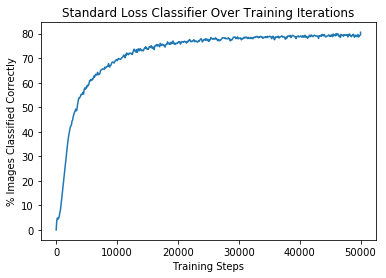

In [4]:
batch_size=128
cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,1], logits=y_1) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,2], logits=y_2) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,3], logits=y_3) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,4], logits=y_4) +
                              tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y[:,5], logits=y_5))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_predictions = tf.reduce_min(tf.cast(tf.equal(y_pred_class,y[:,1:]), tf.float32),1)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32), name='accuracy')
sess.run(tf.global_variables_initializer())
print('Initialized')
accuracy_curve = []
for step in range(50001):
    offset = (step * batch_size) % (train_dataset.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    if step%100 == 0:
        acc = sess.run(accuracy,feed_dict={x_image : batch_data, y : batch_labels, keep_prob : 1.0})
        print("step %d, Batch accuracy %g"%(step, acc))
        acc = sess.run(accuracy,feed_dict={x_image : valid_dataset, y : valid_labels, keep_prob : 1.0}) 
        print("Valid accuracy %g"%acc)
        accuracy_curve.append((step,100.0*acc))
    train_step.run(feed_dict={x_image: batch_data, y : batch_labels, keep_prob: 0.5})
acc = sess.run(accuracy,feed_dict={x_image : test_dataset, y : test_labels, keep_prob : 1.0}) 
print("Test accuracy %g"%acc)
accuracy_curve.append((50001,100.0*acc))
save_model_path = './multi_digit_classification_standard'
# Save Model
saver = tf.train.Saver()
save_path = saver.save(sess, save_model_path)

plt.plot(*zip(*accuracy_curve))
plt.title('Standard Loss Classifier Over Training Iterations')
plt.xlabel('Training Steps')
plt.ylabel('% Images Classified Correctly')
plt.show()

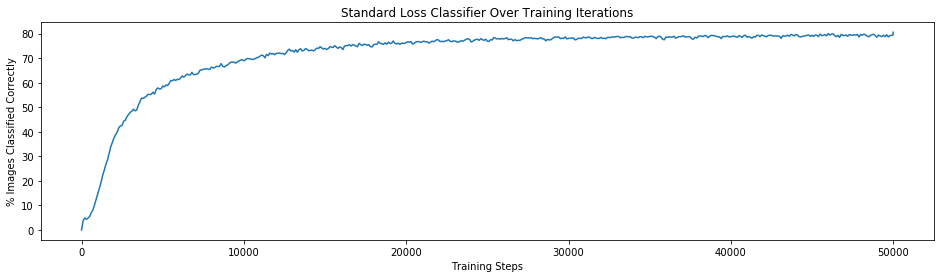

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0,4.0)

plt.plot(*zip(*accuracy_curve))
plt.title('Standard Loss Classifier Over Training Iterations')
plt.xlabel('Training Steps')
plt.ylabel('% Images Classified Correctly')
plt.show()
